In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import torch

from experiments.kolmogorov.utils import *

chain = make_chain()

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [2]:
x = np.load(PATH / 'data/x_000016.npy')
x = torch.from_numpy(x)
x = chain.coarsen(x[:9], 4)
w = chain.vorticity(x)

draw(w.reshape(3, 3, 64, 64), zoom=4).save('vorticity_grid_3x3.png')

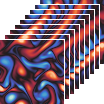

In [3]:
# sandwich(w, mirror=True)
img2 = sandwich(w, mirror=True)
img2.save('sandwich_mirror.png')
img2

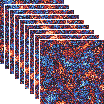

In [4]:
# sandwich(0.7 * w + 0.4 * torch.randn_like(w))
img3 = sandwich(0.7 * w + 0.4 * torch.randn_like(w))
img3.save('sandwich_noise_test.png')
img3